In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings ('ignore')

In [4]:
data = pd.read_csv('happiness_score_dataset.csv')

In [5]:
data.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [6]:
data.shape

(158, 12)

In [7]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
data.info

<bound method DataFrame.info of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  

In [9]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


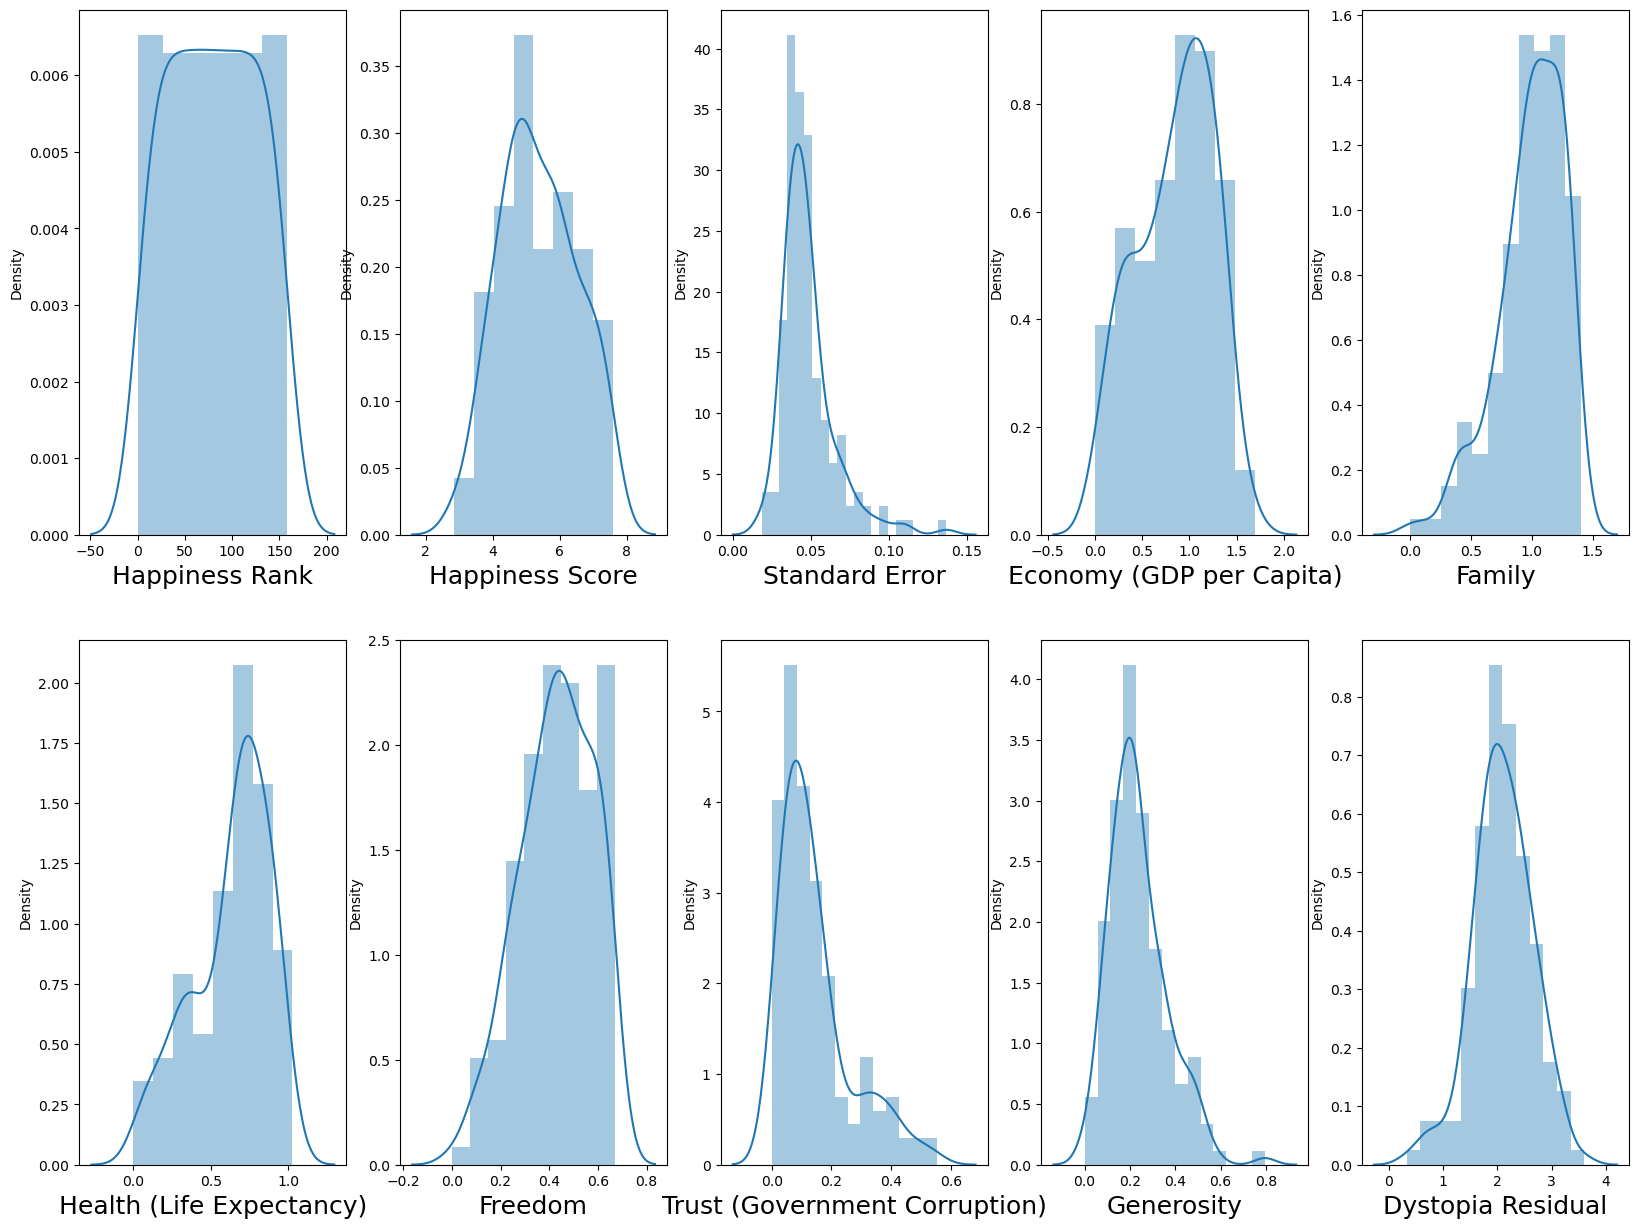

In [11]:
columns = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

plotnumber = 1
plt.figure(figsize=(20,15))
for column in columns:
    if plotnumber <= 10:
        ax = plt.subplot(2, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

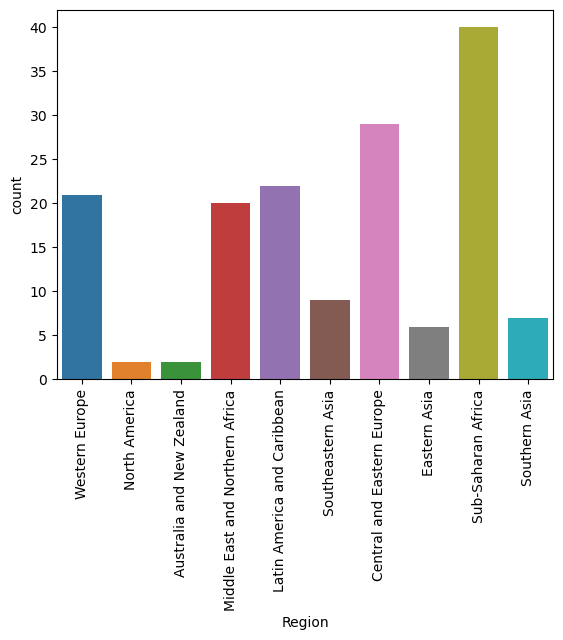

In [12]:
sns.countplot(data=data, x='Region')
plt.xticks(rotation=90)


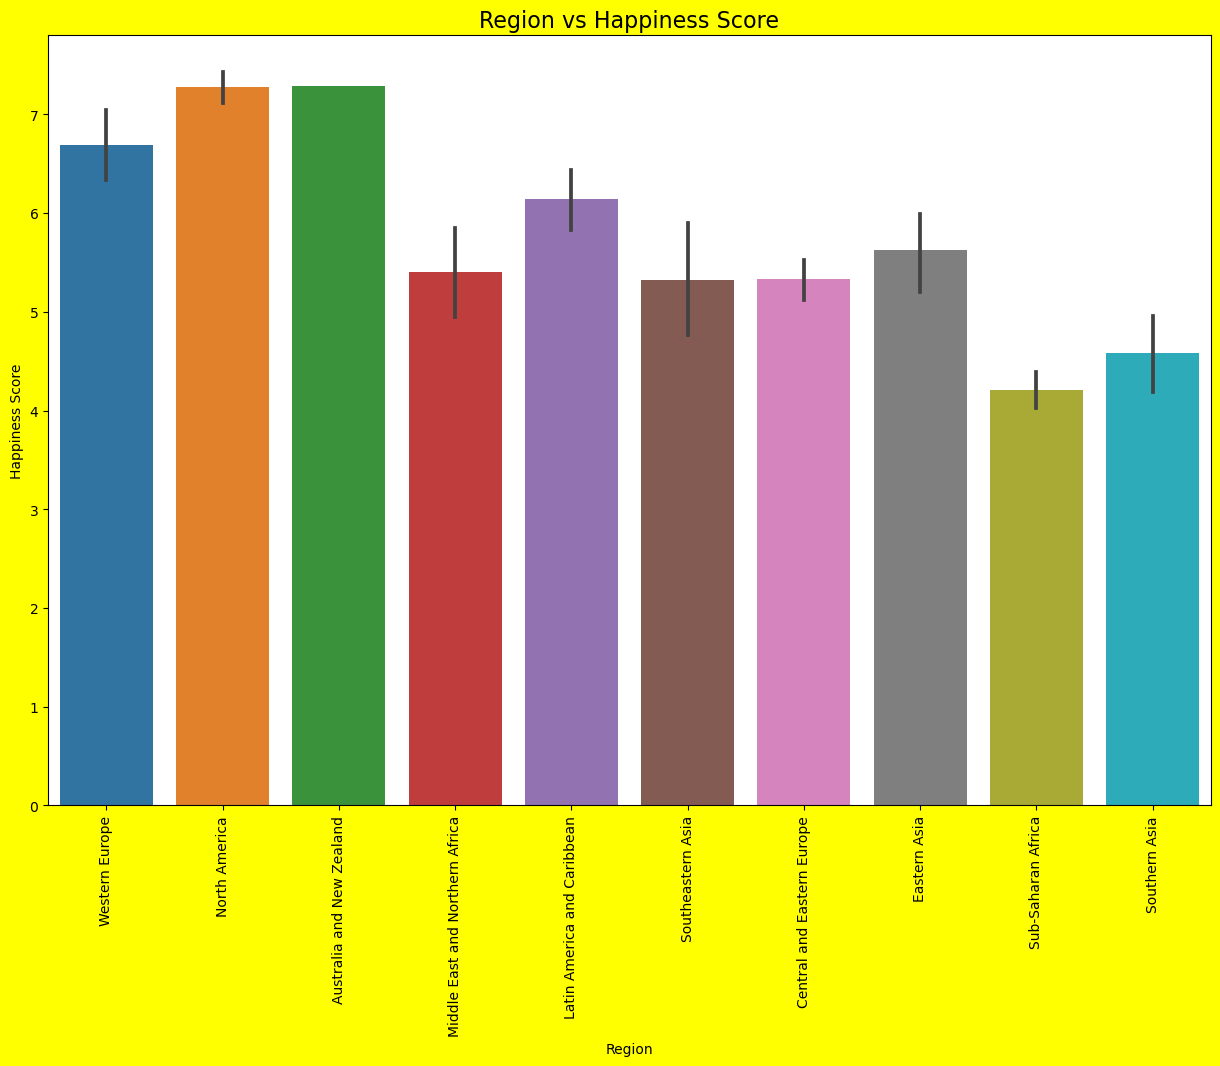

In [13]:
x= ['Region']
y=['Happiness Score']

plt.figure(figsize=(15,10), facecolor='yellow')
sns.barplot(data=data, x='Region',y='Happiness Score')
plt.title('Region vs Happiness Score', fontsize=16)
plt.xticks(rotation=90) 
plt.show()

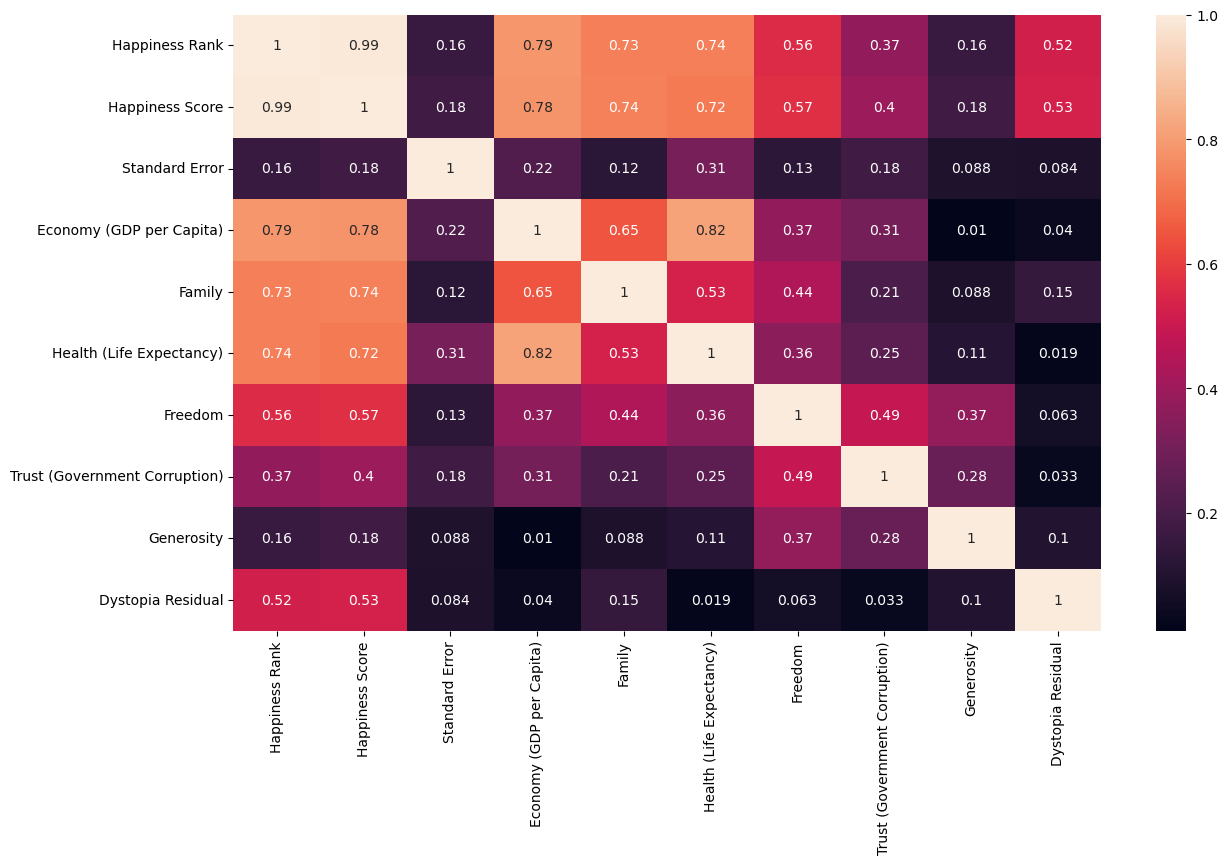

In [14]:
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

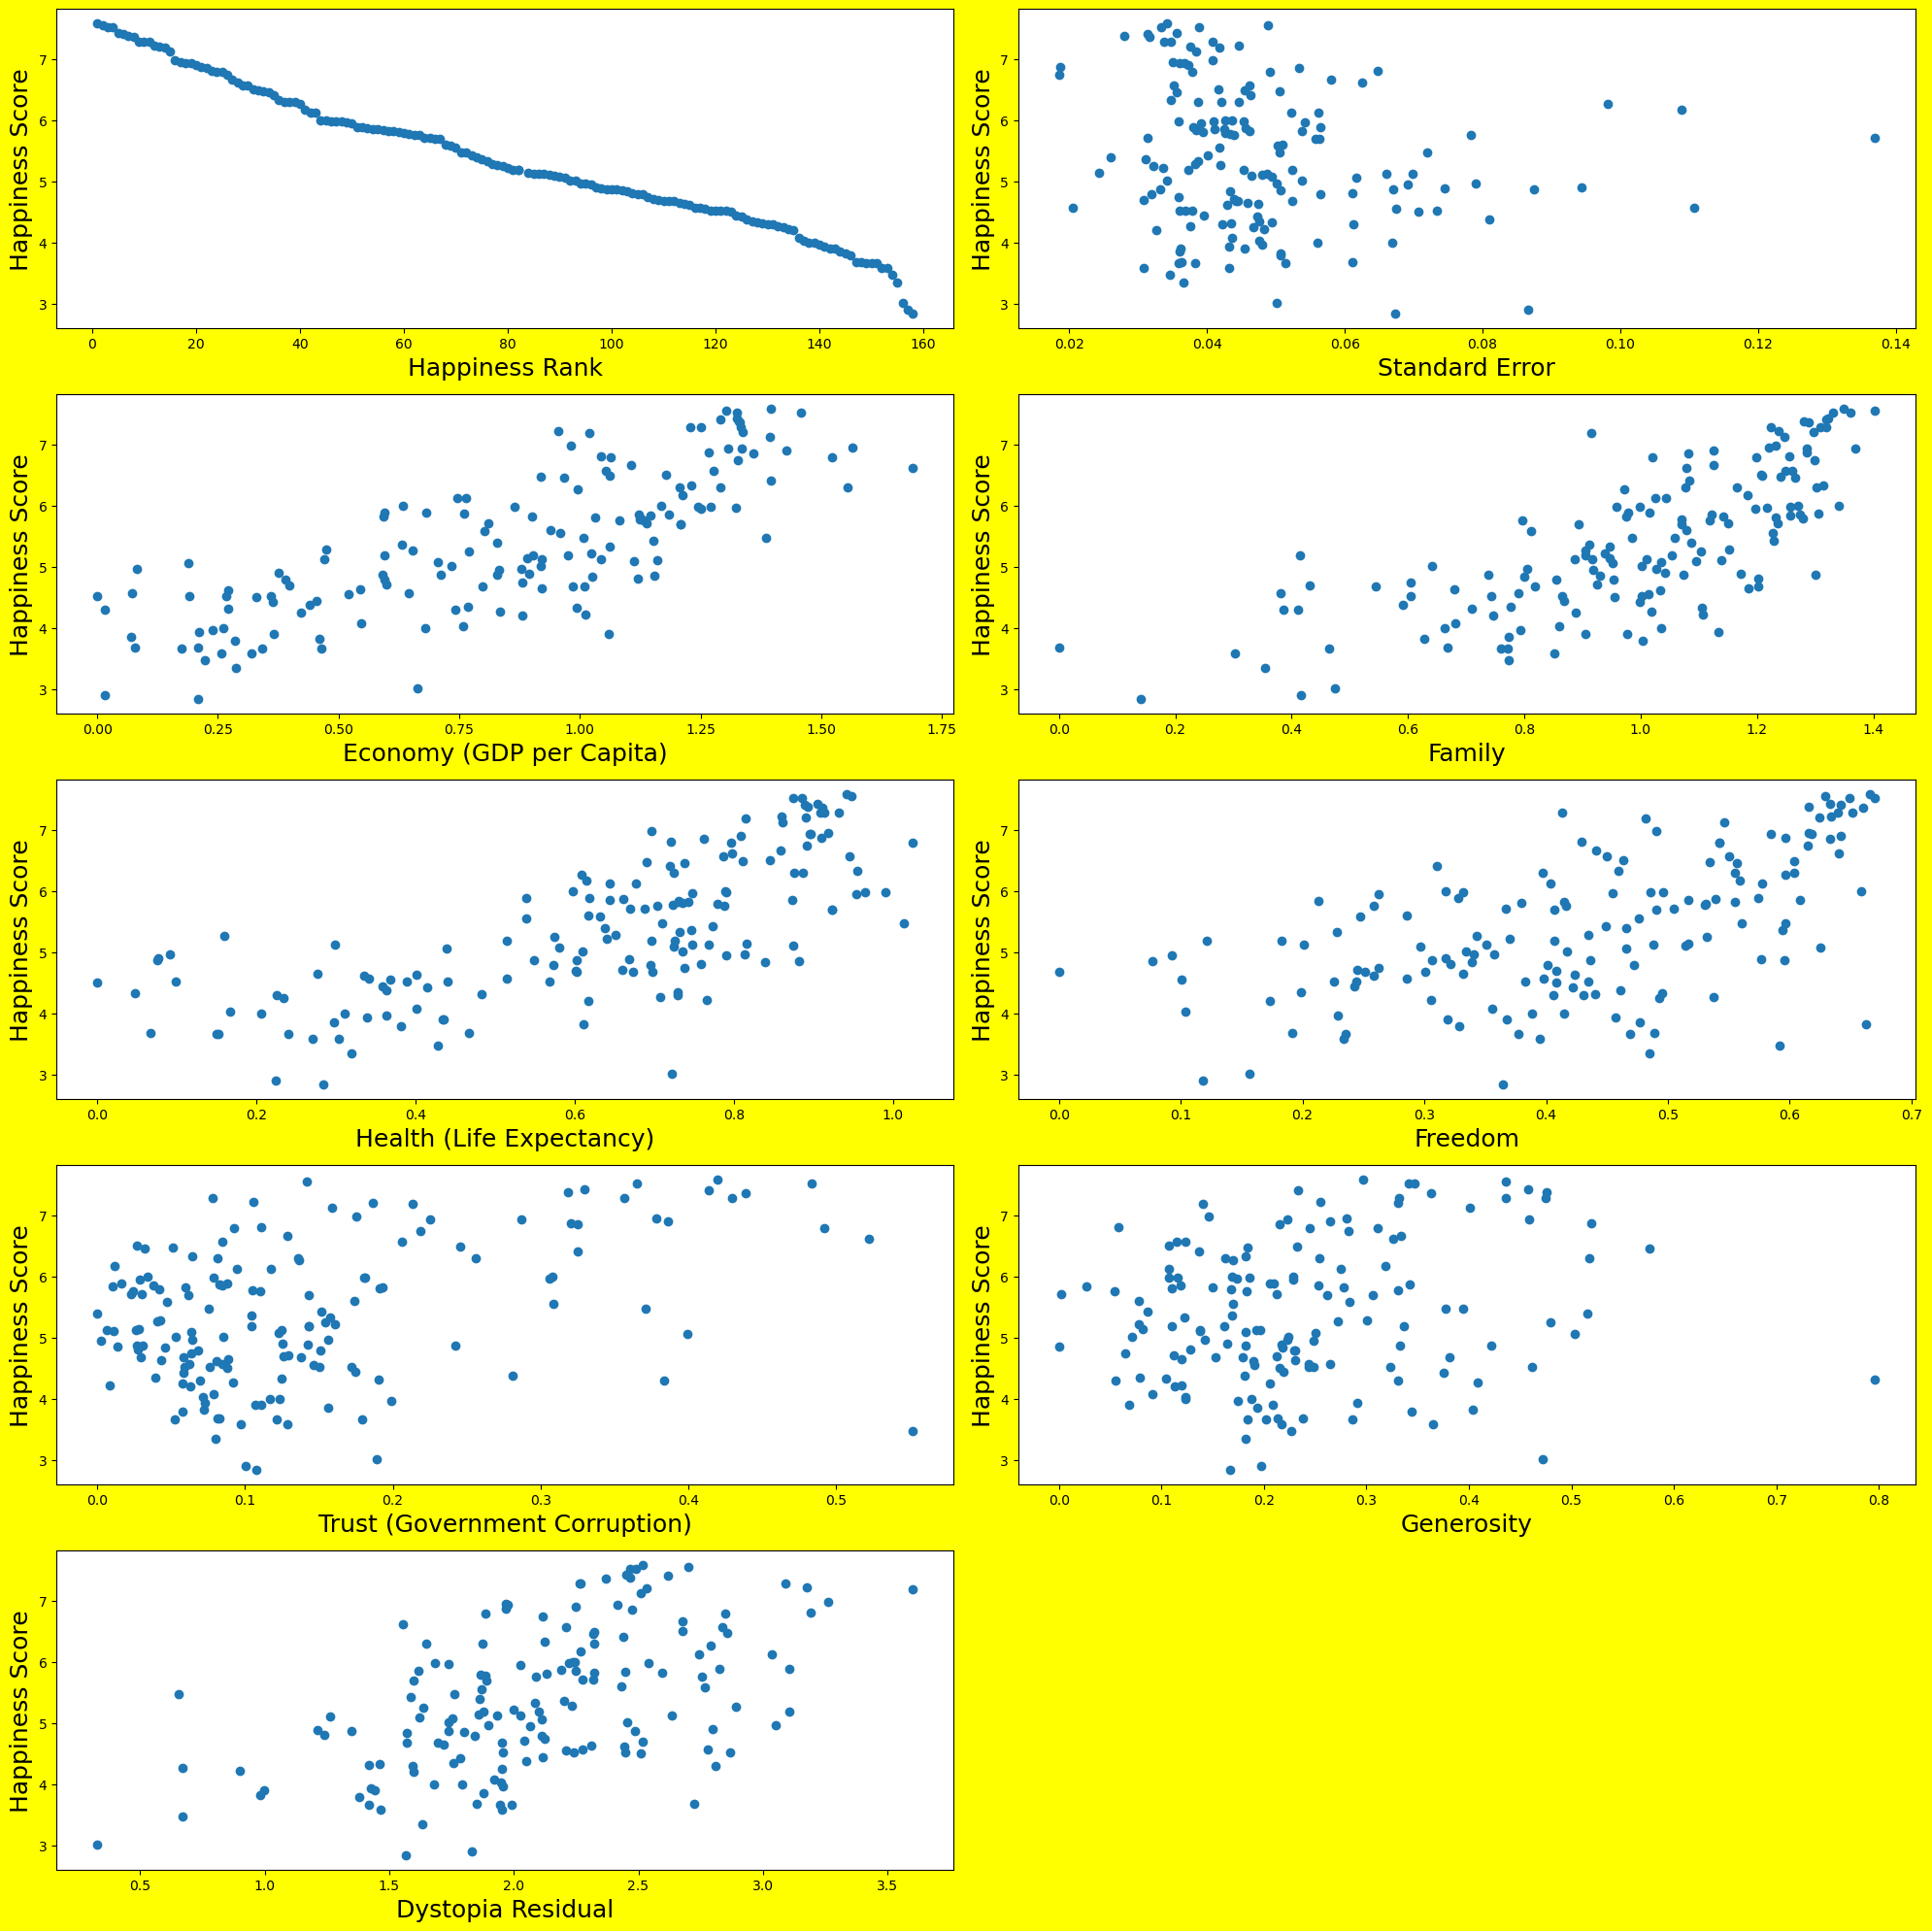

In [15]:
x = data[['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
y= (data['Happiness Score'])
plt.figure(figsize=(20,20), facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter (x[column], y)
        plt.xlabel(column, fontsize=18)
        plt.ylabel ('Happiness Score', fontsize=18)
        plotnumber +=1
        plt.tight_layout()

In [16]:
data = pd.get_dummies(data, columns=['Country', 'Region'])

In [17]:
data

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,1
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,1
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,1
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,1
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,...,0,0,0,0,0,0,0,0,1,0
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,...,0,0,0,0,0,0,0,0,1,0
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,...,0,0,0,0,1,0,0,0,0,0
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,...,0,0,0,0,0,0,0,0,1,0


In [40]:
x= data.drop (columns= ['Standard Error', 'Happiness Rank', 'Happiness Score'], axis=1)
y= data ['Happiness Score']

In [41]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.25, random_state= 41)

In [20]:
y_train.head()

156    2.905
146    3.681
103    4.800
152    3.575
14     7.119
Name: Happiness Score, dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [22]:
scaled_data

array([[-1.72099989,  1.93736005, -0.80592569, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [-1.69907456,  1.91458063,  0.05588945, ..., -0.21530819,
        -0.58222251,  2.55417492],
       [-1.67714922,  1.88479215, -0.8544869 , ..., -0.21530819,
        -0.58222251,  2.55417492],
       ...,
       [ 1.67742676, -2.0761992 ,  0.13253425, ..., -0.21530819,
        -0.58222251, -0.39151586],
       [ 1.69935209, -2.1646885 ,  2.26396166, ..., -0.21530819,
         1.7175564 , -0.39151586],
       [ 1.72127743, -2.22251319,  1.13418227, ..., -0.21530819,
         1.7175564 , -0.39151586]])

In [23]:
regression = LinearRegression()
regression.fit(x_train, y_train)
pred_train=regression.predict(x_train)
pred=regression.predict(x_test)
r2=r2_score(y_test, pred)
print ('R2=:',r2)

R2=: 0.7822635932928955


In [24]:
print('R2 score on training data:',r2_score(y_train, pred_train)*100 )
print('Mean absolute error:',mean_absolute_error(y_test, pred) )
print('Mean squared error:',mean_squared_error(y_test, pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred)))

R2 score on training data: 100.0
Mean absolute error: 0.4190093900920294
Mean squared error: 0.2985068154571384
Root mean squared error: 0.5463577723956514


In [30]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
regression2 = LinearRegression()


In [35]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regression2.fit(x_train, y_train)
    y_pred = regression2.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    
    mse_scores.append(mse)

average_mse = np.mean(mse_scores)
print("Mean Squared Error per fold:", mse_scores)
print("Average Mean Squared Error:", average_mse)


Mean Squared Error per fold: [0.021248083093800545, 0.23420316172287328, 0.38504483512792564, 0.10123653391655735, 0.11314890533906177, 0.021248083093800545, 0.23420316172287328, 0.38504483512792564, 0.10123653391655735, 0.11314890533906177]
Average Mean Squared Error: 0.17097630384004373


In [39]:
import pickle
filename= 'Happiness_lin_reg.pkl'
pickle.dump(regression, open(filename,'wb'))
loaded_model= pickle.load(open('Happiness_lin_reg.pkl', 'rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

96.15273203412079
